In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, linalg
# Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from math import log
from sklearn import metrics

#dataset can be found at (https://www.kaggle.com/harlfoxem/housesalesprediction)

data_path=('/Users/shwetapai/Downloads/kc_house_data.csv')
df_housing = pd.read_csv(data_path)

In [2]:
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


**DATA EXPLORATION**
The aim of this section is to identify any potential issues (outliers ,unexpected entries etc) with the features and decide on how to handle those issues.

**EXAMINATION OF THE TARGET VARIABLE 'PRICE'**


Skew is: 4.024069144684712


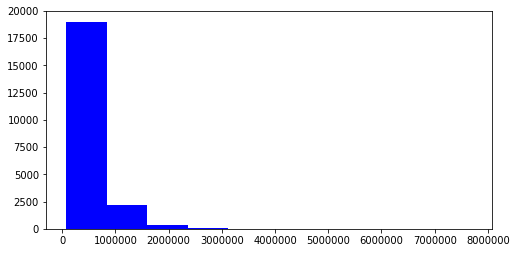

In [5]:
print ("Skew is:",df_housing.price.skew())
plt.figure(figsize=(8,4))
plt.hist(df_housing.price, color='blue')
plt.show()

**Observation**
The histogram shows a normal distribution with a long tail, which is exactly what we would expect
for data of this kind.

**Log Transformation of 'price' to reduce skewness**

Skew is: 0.42807247557592526


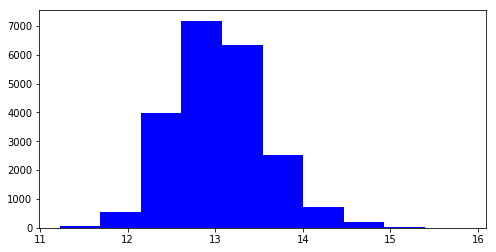

In [6]:
target = np.log(df_housing.price)
print ("Skew is:", target.skew())
plt.figure(figsize=(8,4))
plt.hist(target, color='blue')
plt.show()

**HEATMAP TO VISUALIZE CORRELATION BETWEEN VARIOUS FEATURES AND THE TARGER VARIABLE**

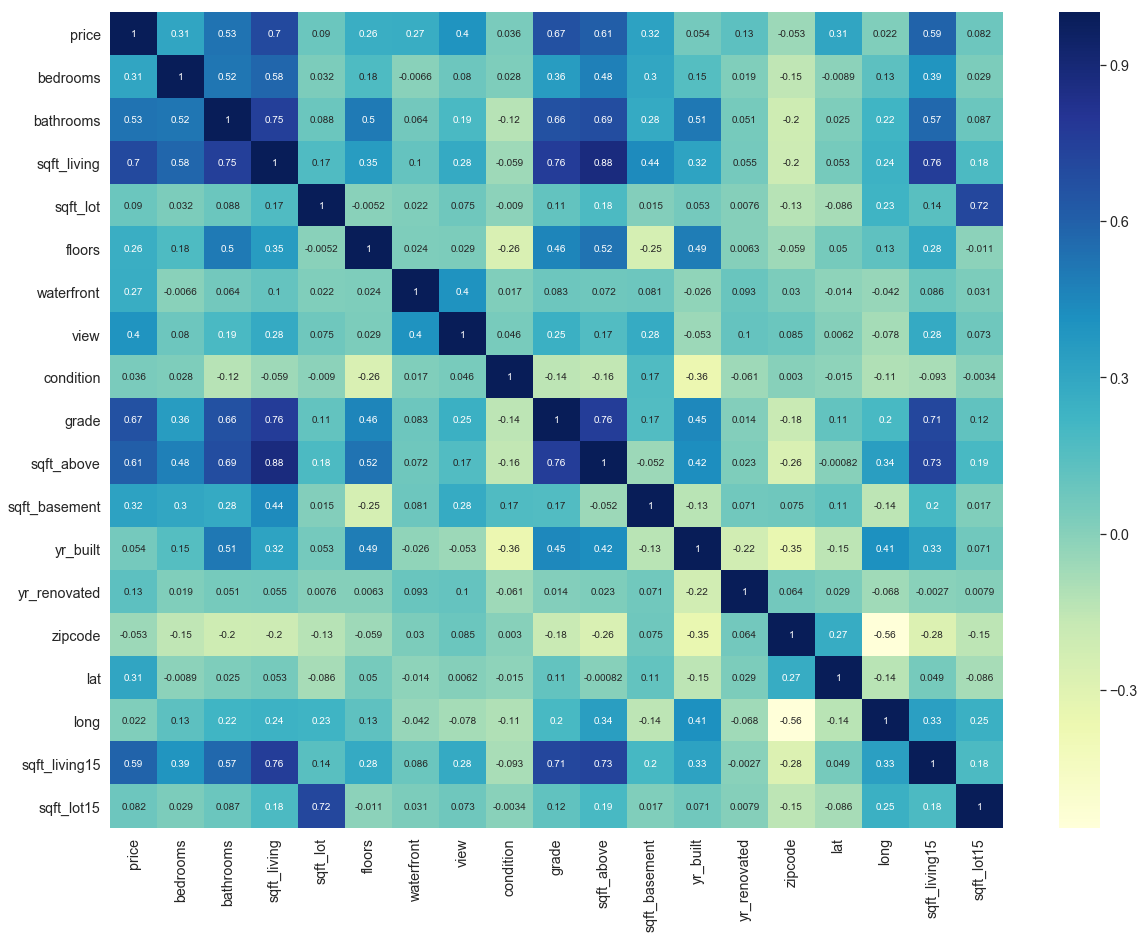

In [301]:
#Looking at distribution of various featires ( correlation matrix)
#Calculation correlations

corr=df_housing.corr().iloc[1:,1:] #eliminating colum'id'
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")


**EXAMINATION OF ASSOCIATION OF 'ORDINAL' FEATURES WITH THE TARGET VARIABLE**

**Feature 1.'Bedrooms'**

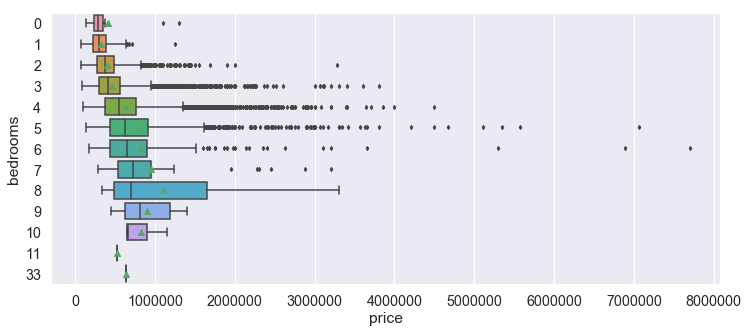

In [273]:
#Variable 'bedrooms'
plt.figure(figsize=(12,5))
sns.boxplot(y = 'bedrooms', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)


In [274]:
df_housing[df_housing.bedrooms== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


**Observation** 
There seems to be an anomaly.One house seems to have 33 bedrooms. Although such houses do exist, the price of this house is less than a million,and it has 1.75 bathrooms and is on 1 floor.This suggests that the house has 3 bedrooms and the 33 is a data entry error.So it is safer to remove that entry from analysis.

In [275]:
df_housing.drop(df_housing.index[15870])
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


**Features: 'Bathrooms','Floors','View','Condition','grade'**

Creating box plots to visualize the assocuation of each type ordinal features witht he targer variable.


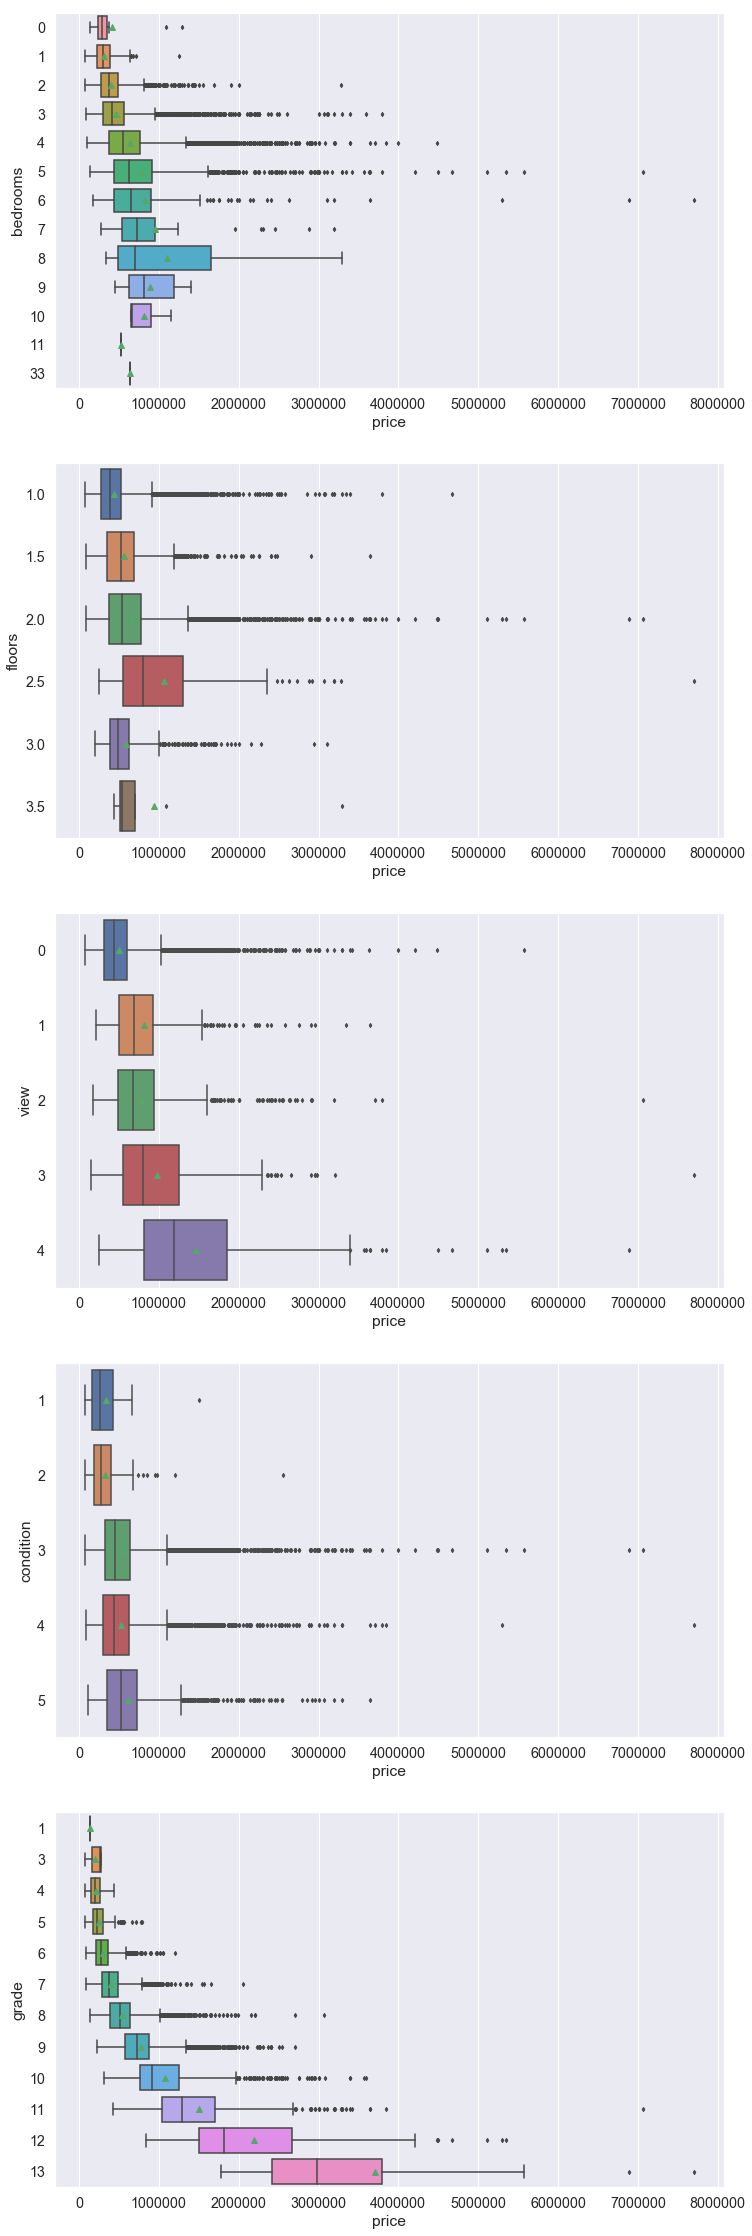

In [276]:
fig, axarr = plt.subplots(5, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'floors', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'view', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'condition', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'grade', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
plt.show()

**Using Pearson's coefficient r to measures the strength and direction of the relationship between ordinal feature and the target variable**

In [277]:
r,p = stats.spearmanr(df_housing['bedrooms'], df_housing['price'])
print ('spearman correlation r between price and bedrooms is %s with p=%s' %(r,p))
r, p = stats.spearmanr(df_housing['bathrooms'], df_housing['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df_housing['floors'], df_housing['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df_housing['view'], df_housing['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df_housing['condition'], df_housing['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df_housing['grade'], df_housing['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.34465237095978885 with p=0.0
spearman correlation r between price and bathrooms is 0.49716035081092047 with p = 0.0
spearman correlation r between price and floors is 0.32234655003563695 with p = 0.0
spearman correlation r between price and view is 0.29393116417024306 with p = 0.0
spearman correlation r between price and condition is 0.018489958301262526 with p = 0.006560828406548436
spearman correlation r between price and grade is 0.6582152214259374 with p = 0.0


**Observations**

There is associations between the above features and the target variable (except for condition). Feature 'grade' seems to be the best indicator.

**EXAMINATION OF CONTINUOUS FEATURES WITHT THE TARGET VARIABLE**

**Features: 'Sqft_living','sqft_living15'.'sqft_above'**

Features 'sqft_above' and 'sqft_living15' seem to be strongly related to price. Analysing their associations (along with sqft_living) using the pairgrid().(This function creates a matrix of axes and shows the relationship for each pair of the selected variables).



/Users/shwetapai/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/Users/shwetapai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


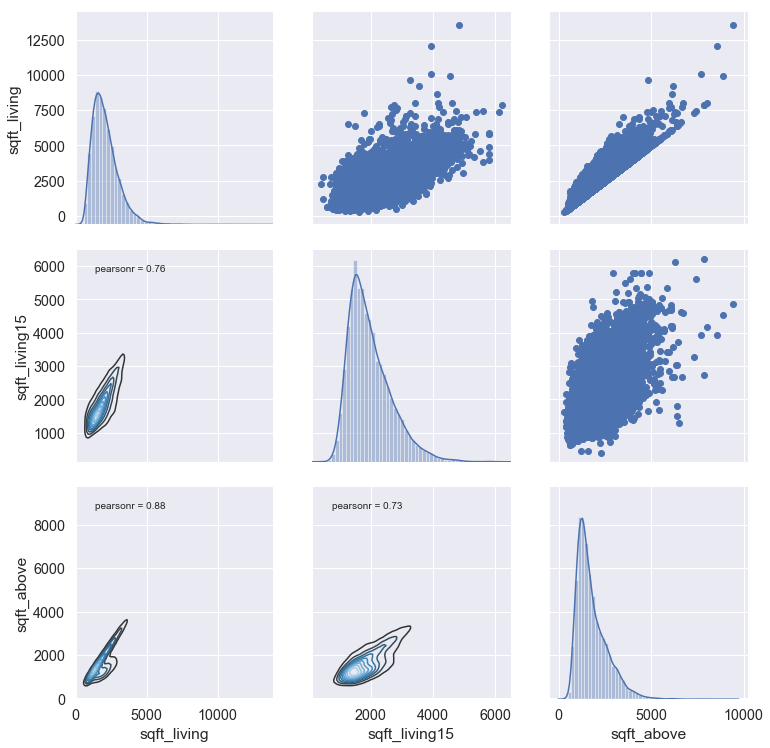

In [278]:
# Function to display pearson coefficients on the lower graphs.
def corr_variables(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("pearsonr = {:.2f}".format(r),
               xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(df_housing, vars = ['sqft_living', 'sqft_living15', 'sqft_above'], size = 3.5) # define the pairgrid
g.map_upper(plt.scatter) 
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corr_variables)
plt.show()

**Observations**
The correlation coefficient r is high for all 3 features.So there is a strong positive relationship between the 3 features.

I am not sure if the association of sqft_15 with target variable is actually due to the average square footage of the 15th closest houses. This is because of the high correlation between sqft_living15 and sqft_living.It might be a confounding factor.So I will remove it from further analysis as sqft_living will already be included in the analysis.

**EXAMINATION OF DICOTOMOUS FEATURES (WITH UNDERLYING CONTINUOUS DISTRIBUTION) WITH THE TARGET VARIABLE** 

There is a lot of zeros in under the feature 'sqft_distribution' (i.e., no basement).The houses with basement seem to have an association with the target variable. Similarly, there is a lot of zeros in the yr_renovated variable.

It would be useful to convert these variable sinto binary variables and restest the association tests for these two features without the zeros.

/Users/shwetapai/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/shwetapai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/shwetapai/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


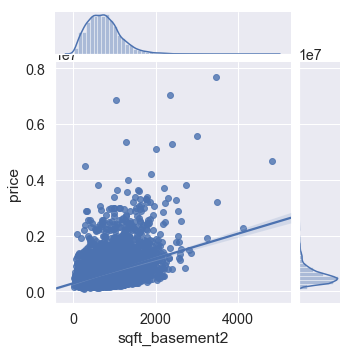

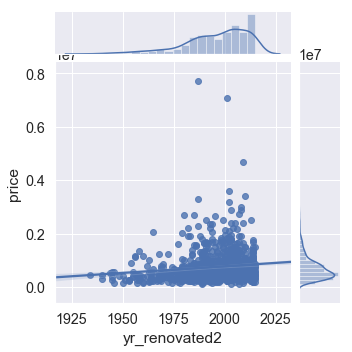

In [279]:
#Creating 2 new columns
df_housing['sqft_basement2'] = df_housing['sqft_basement'].apply(lambda x: x if x > 0 else None)
df_housing['yr_renovated2'] = df_housing['yr_renovated'].apply(lambda x: x if x > 0 else None)

# Show the new plots with paerson correlation
sns.jointplot(x="sqft_basement2", y="price", data=df_housing, kind = 'reg', dropna=True, size = 5)
sns.jointplot(x="yr_renovated2", y="price", data=df_housing, kind = 'reg', dropna=True, size = 5)
plt.show()

**Observations**
The target is moderately correlated with the size of the basement (if basement present). There is also a small correlation with the year of the renovation (if renovated).
it would be useful to classify basement and renovation as dichotomous variables (e.g., 0 for no basement, 1 for basement present).




In [280]:
#Classifying basement and renovated as dichotomous variable.

df_housing['presence_of_basement'] = df_housing['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

df_housing['presence_of_renovation'] = df_housing['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,presence_of_basement,presence_of_renovation
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,NaN,NaN,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,400.0,1991.0,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,NaN,NaN,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,910.0,NaN,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,NaN,NaN,0,0


**Checking for association with the target variable**

We can use a point-biserial correlation coefficient ( Point-Biserial Correlation Coefficient is a correlation measure of the strength of association between a continuous-level variable (ratio or interval data) and a binary variable )to highlight the relationship between the two variables.

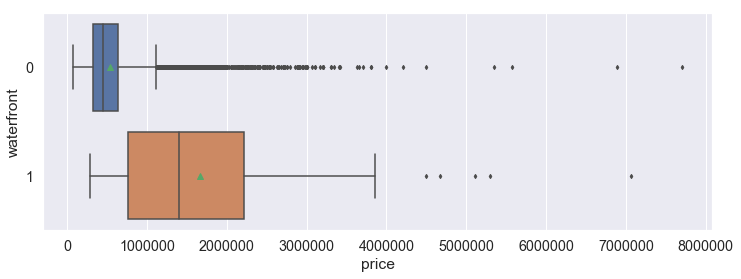

point biserial correlation r is 0.2663694340306021 with p = 0.0


In [281]:
# variable 'waterfront'
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'waterfront', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(df_housing['waterfront'], df_housing['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

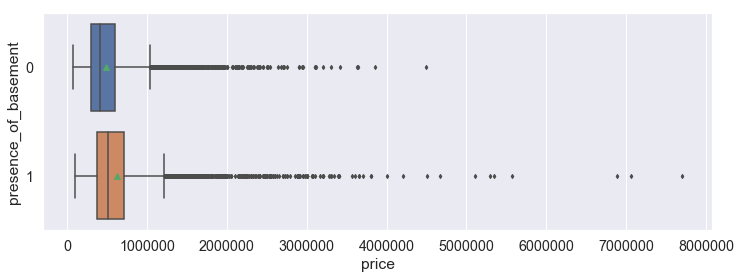

point biserial correlation r between price and presence_of_basement is 0.18023008665021023 with p = 3.2567787361972933e-157


In [282]:
# variable basement_present
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'presence_of_basement', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
r, p = stats.pointbiserialr(df_housing['presence_of_basement'], df_housing['price'])
print ('point biserial correlation r between price and presence_of_basement is %s with p = %s' %(r,p))

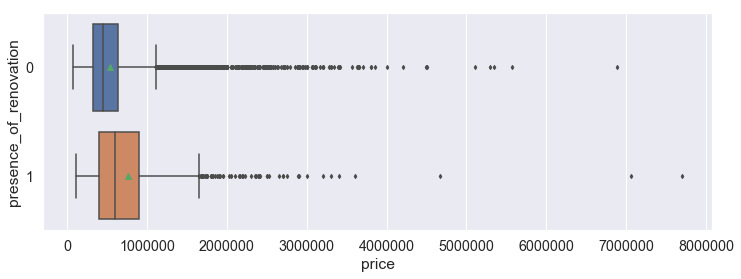

point biserial correlation r between price and presence_of_renovation is 0.12609226271139487 with p = 2.6401485917732445e-77


In [283]:
#variable 'renovated'
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'presence_of_renovation', x = 'price', data = df_housing,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(df_housing['presence_of_renovation'], df_housing['price'])
print ('point biserial correlation r between price and presence_of_renovation is %s with p = %s' %(r,p))

**Observations**
The association is fairly small (0.1 < r < 0.3).

**CONCLUSION**

After analysing the association between or target variable ('price') and other dependent features in our dataset,I had  the following observations:

**1.** sqft_living, sqft_above and sqft_basement are moderately to strongly correlated with price. The 3 variables were also strongly related to each other as sqft_living = sqft_above and sqft_basement.So I will be removing sqft_above from the analysis and including the other 2 variables.

**2.**There was strong correlation between sqft_living15 (the average house square footage of the 15 closest neighbors) and price. However the association decreased when I removed the confounding factor.

**3.**There was small correlation between the three dichotomous variables (waterfront, basement_present, renovated)  and price. 

**4.**Five of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price.

**DATA PREPARATION/PROCESSING**

**Creating/adding new columns**

Firstly,lets remove the features that won't be included in the analysis. 

In [284]:
#Tranforming 'Date' to a datetime series.

df_housing['Date']=pd.to_datetime(df_housing['date'],format="%Y/%m/%d")
df_housing['year'] = df_housing['Date'].dt.year

#Creating column'property_age' from 'year_built' and 'year'.
df_housing['property_age']=df_housing['year']-df_housing['yr_built']


df_housing.drop('date', axis=1, inplace=True) # dropping the original 'date column'
df_housing.drop('Date', axis=1, inplace=True) # dropping the Datetime series column after calculating 'property_age'
df_housing.drop('sqft_basement2',axis=1,inplace=True) #dropping the feature 'sqft_basement2' that I created earlier
df_housing.drop('yr_renovated2',axis=1,inplace=True)#dropping the feature 'yr_renovated' that I created earlier.
df_housing.drop('long',axis=1,inplace=True) #dropping longitude
df_housing.drop('id',axis=1,inplace=True) #dropping house id



df_housing.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,presence_of_basement,presence_of_renovation,year,property_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,1340,5650,0,0,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,1690,7639,1,1,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,2720,8062,0,0,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,1360,5000,1,0,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,1800,7503,0,0,2015,28


In [285]:
df_housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15', 'presence_of_basement',
       'presence_of_renovation', 'year', 'property_age'],
      dtype='object')

**Converting 'sqft_basement' and 'yr_renovated' to dichotomous variables**

In [286]:
df_housing['basement_present'] = df_housing['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

df_housing['renovated'] = df_housing['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)


df_housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,sqft_living15,sqft_lot15,presence_of_basement,presence_of_renovation,year,property_age,basement_present,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,1340,5650,0,0,2014,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,1690,7639,1,1,2014,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,2720,8062,0,0,2015,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,1360,5000,1,0,2014,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,1800,7503,0,0,2015,28,0,0


In [287]:
#Remove sqft_basement and yr_renovated
df_housing.drop('sqft_basement',axis=1,inplace=True)
df_housing.drop('yr_renovated',axis=1,inplace=True)

df_housing.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,sqft_living15,sqft_lot15,presence_of_basement,presence_of_renovation,year,property_age,basement_present,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,1340,5650,0,0,2014,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,1690,7639,1,1,2014,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,2720,8062,0,0,2015,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,1360,5000,1,0,2014,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,1800,7503,0,0,2015,28,0,0


**Creating Dummy Variables**

In [288]:
#creating dummy variables for columns 'view' and 'grade'

categorial_cols = [ 'view', 'grade']

for cc in categorial_cols:
    dummies = pd.get_dummies(df_housing[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df_housing.drop(cc, axis=1, inplace=True)
    df_housing = df_housing.join(dummies)


The column 'zipcodes'is also associated to price. But if we encode all zipcodes will add 70 dummies variables.That would be too many features to analyze.So I will create dummy variables for just 6 of the most expensive zipcodes.

In [289]:
#creating dummy variables for top 6 zipcoodes.

dummies_zipcodes = pd.get_dummies(df_housing['zipcode'], drop_first=False)
dummies_zipcodes.reset_index(inplace=True)
dummies_zipcodes = dummies_zipcodes.add_prefix("{}#".format('zipcode'))
dummies_zipcodes = dummies_zipcodes[['zipcode#98004','zipcode#98102','zipcode#98109','zipcode#98112','zipcode#98039','zipcode#98040']]
df_housing.drop('zipcode', axis=1, inplace=True)
df_housing = df_housing.join(dummies_zipcodes)


In [290]:
df_housing_out.shape

(15149, 21)

**MODEL TESTING**

I used 42 features to predict the target variable.

**Splitting our Dataset**

In [187]:
from sklearn.model_selection import train_test_split
X=df_housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'presence_of_basement', 'presence_of_renovation', 'year',
       'property_age', 'basement_present', 'renovated', 'view#0', 'view#1',
       'view#2', 'view#3', 'view#4', 'grade#1', 'grade#3', 'grade#4',
       'grade#5', 'grade#6', 'grade#7', 'grade#8', 'grade#9', 'grade#10',
       'grade#11', 'grade#12', 'grade#13', 'zipcode#98004', 'zipcode#98102',
       'zipcode#98109', 'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]
y=np.log(df_housing.price)
                                                    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [189]:
X_train.shape, X_test.shape

((17290, 40), (4323, 40))

In [190]:
from sklearn.cross_validation import train_test_split
lr = LinearRegression()

#fitting model on training data
lr.fit(X_train,y_train)

#predicting on the training data

y_pred=lr.predict(X_train)

#calculating score on the linear regression model on the training set
r_score=lr.score(X_train,y_train)
r_score

0.6978701743132946

**Fitting a Polynomial to check if it improves the R2**

In [195]:
#Fitting a polynomial on the training set
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from sklearn import metrics

degree=[1,2,3]
r2_score_polydegrees=[]
rmse_polyfeatures=[]
for degrees in degree:
    est = make_pipeline(PolynomialFeatures(degree=degrees,interaction_only=True), StandardScaler(), LinearRegression())
    est.fit(X_train, y_train)
    mse = metrics.mean_squared_error(y_train, est.predict(X_train))
    rmse_polyfeatures.append(np.sqrt(metrics.mean_squared_error(y_train, est.predict(X_train))))
    r2_score_polydegrees.append(est.score(X_train,y_train))
print(r2_score_polydegrees,rmse_polyfeatures)


[0.697870308918381, 0.7289225250793955, 0.7674118902940972] [0.2907369809593006, 0.27539134607682714, 0.25509228710079684]


We see that the r2 is highest ( r2=0.767) and the root mean square error is lowest (rmse=0.255) for third order polynomial .So lets add  a polynomil of degree 3 to out linear regression model.It will include interactions between diffrent features and make nour model more complex.

Not adding polynomials is prone to overfitting.I decided include regularization to reduce over fitting.

**Regularization**

In [218]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
# list row sample - [‘lasso’,degree,alpha,MSE,R^2]



alphas =[0.0001,0.0005,0.001,0.005,0.1,0.5,1,1.5]
sse_tr_lasso=[]
r2_tr_lasso=[]
for alpha in alphas:
    las = make_pipeline(PolynomialFeatures(3, interaction_only=True),StandardScaler(),Lasso(alpha=alpha))
    las.fit(X_train, y_train)
    sse_tr_lasso.append(np.sqrt(mean_squared_error(y_train, las.predict(X_train))))
    r2_tr_lasso.append(las.score(X_train,y_train))
print(sse_tr_lasso,r2_tr_lasso)

/Users/shwetapai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shwetapai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shwetapai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shwetapai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

[0.26656976302912855, 0.27435706200167725, 0.27746997927965983, 0.2874228137795261, 0.3762087478479439, 0.528936543728039, 0.528936543728039, 0.528936543728039] [0.7460111651975551, 0.7309548665175729, 0.7248149366238485, 0.7047191194772164, 0.4941163614465676, 0.0, 0.0, 0.0]


We see that the r2 is highest ( r2=0.746) and the  root mean square error is lowest (rmse=0.266) for alpha=0.0001 and plonomial degree=3 .So lets select a lasso model with alpha=0.0001

**FITTING BEST MODEL ON TEST SET**

In [216]:
#Fitting the above model on test set

est = make_pipeline(PolynomialFeatures(3,interaction_only=True), StandardScaler(), Lasso(0.0001))
est.fit(X_train, y_train)
est.predict(X_test)
rmse_te_Lasso=(np.sqrt(mean_squared_error(y_test, est.predict(X_test))))
r2_te_Lasso=(est.score(X_test,y_test))
print(rmse_te_Lasso,r2_te_Lasso)


/Users/shwetapai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.27947640537044655 0.7080828610517785


In [266]:
#Deloffing Root Mean Square Error (rmse)
rmse_test_delog=np.exp(rmse_te_Lasso)
print(rmse_test_delog)

1.3224372100107475


**Interpretation**

The predicted values of home prices ( by this model)=Actual value of home prices +- 1.3%

The root mean square error for the training and the test sets are low and almost the same **(rmse_test=0.279,rmse_training=0.266)**.So there is no over fitting or underfitting.Adding a polynomial of degree 3 and regularizing the model with Lasso regularization controlled for underfitting and over fitting.

**TESTING THE FITTED MODEL (Diagnostics)**

**Regression Plot**

/Users/shwetapai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Predicted Y')

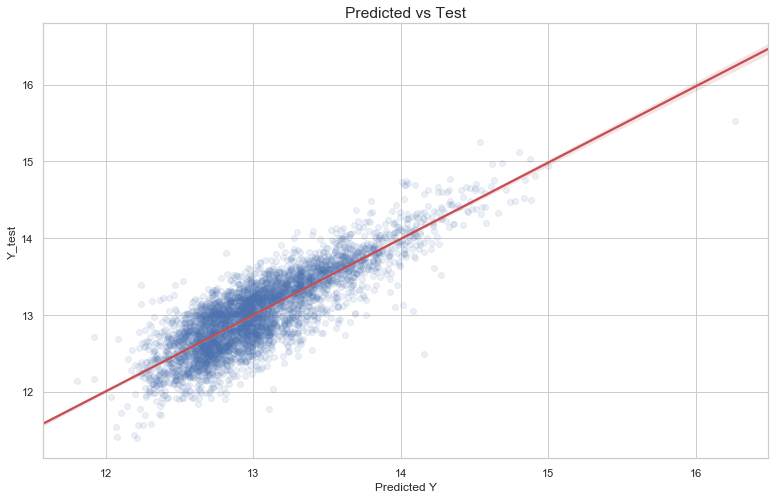

In [265]:
#Regression plot for residuals

test_pred=est.predict(X_test)
residuals_test=y_test-test_pred

plt.figure(figsize=(13,8))

sns.set(style="whitegrid")

sns.regplot(test_pred,y_test,scatter_kws={'color':'b','alpha':0.1},color='r')
sns.set(font_scale=1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y_test')
plt.xlabel('Predicted Y')




**Observation**

The regression plot shows that there’s a strong correlation between the model’s predictions and its actual results.



**Residual Plot**

Text(0.5,1,'Residual Plot')

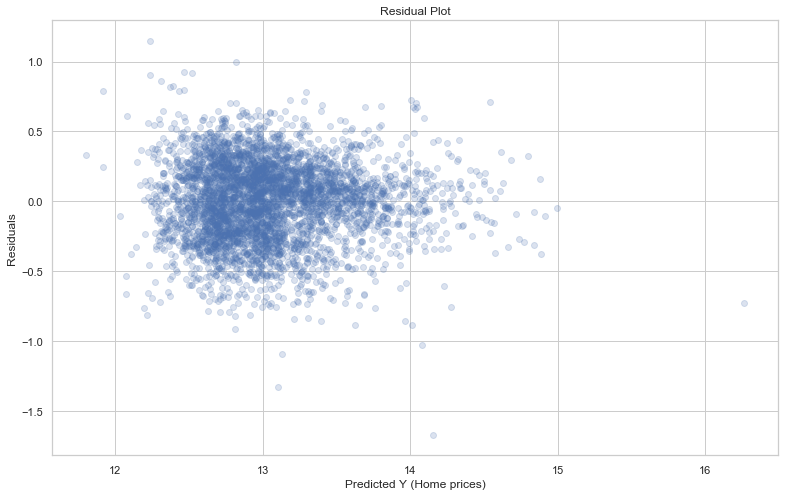

In [257]:
#Residual Plot

sns.set(style="whitegrid")


plt.figure(figsize=(13,8))

plt.scatter(test_pred ,residuals_test,alpha=0.2)
plt.xlabel('Predicted Y (Home prices)')
plt.ylabel('Residuals')
plt.title("Residual Plot")






**Observations**
Most of the residuals are centered around the lower single digits of the y-axis ,so we can sure that they did not have an effect on the model.

**Distribution of Residuals**

Text(0.5,1,'Normal Q-Q plot')

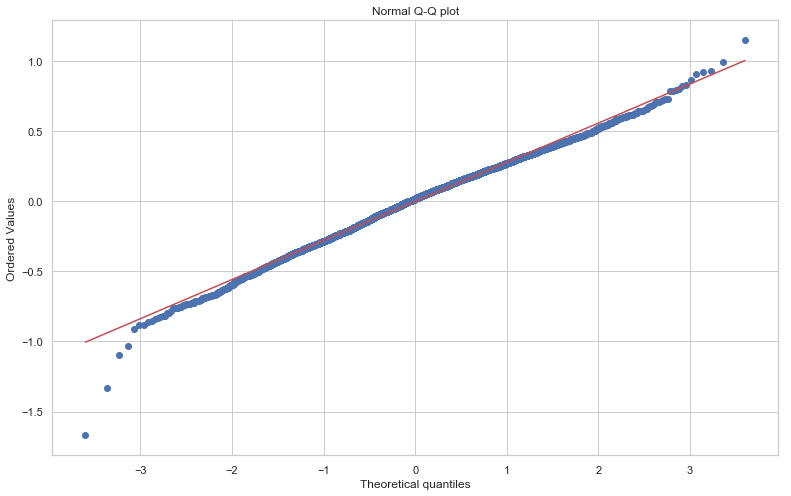

In [259]:
#Normal Q-Q plot

sns.set(style="whitegrid")


plt.figure(figsize=(13,8))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")





/Users/shwetapai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Residuals')

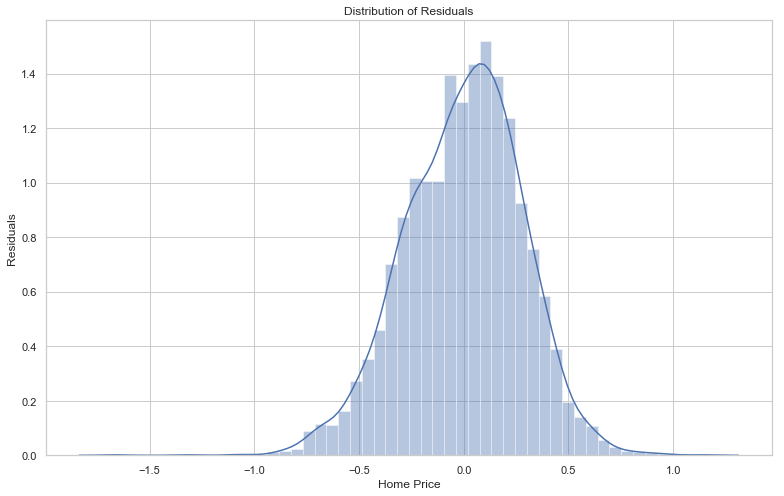

In [261]:

sns.set(style="whitegrid")


plt.figure(figsize=(13,8))
sns.distplot(residuals_test, bins=50, kde=True)
plt.xlabel('Home Price')
plt.ylabel('Residuals')
plt.title("Distribution of Residuals")

**Observations**

The residuals follow a normal distribution fulfilling the assumptions of a linear regression.

**CONCLISION**

In my test dataset, 70% of the predictions for home prices can be explained by my model.The model predicts the home prices in King Couty with an error of +-1.3% of the actual prices.